[*********************100%***********************]  1 of 1 completed


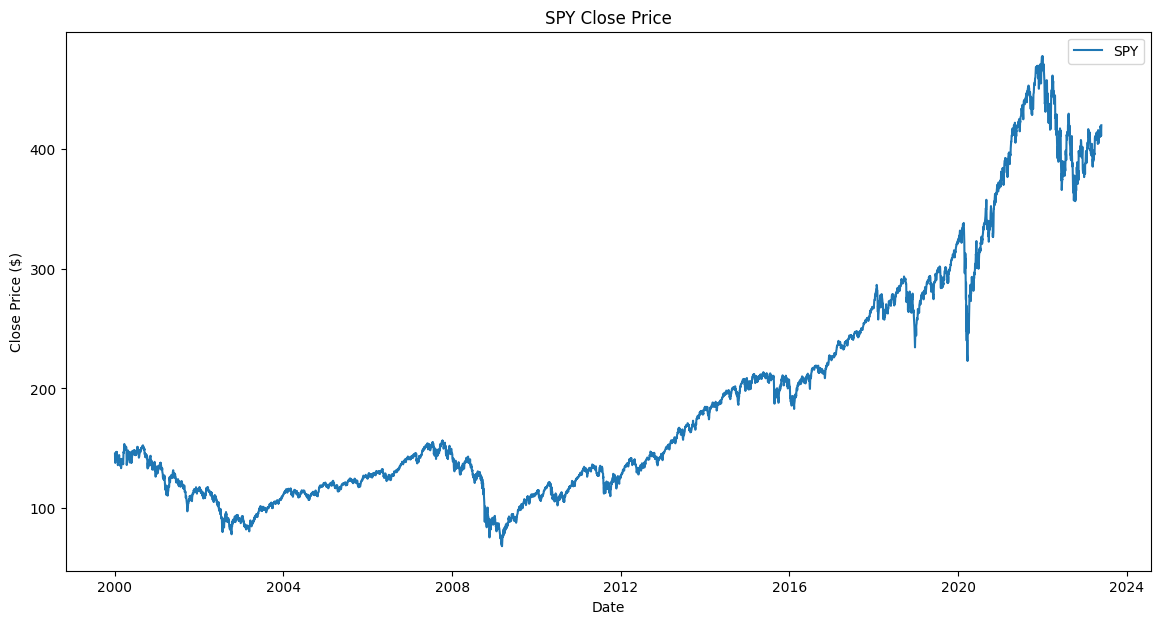

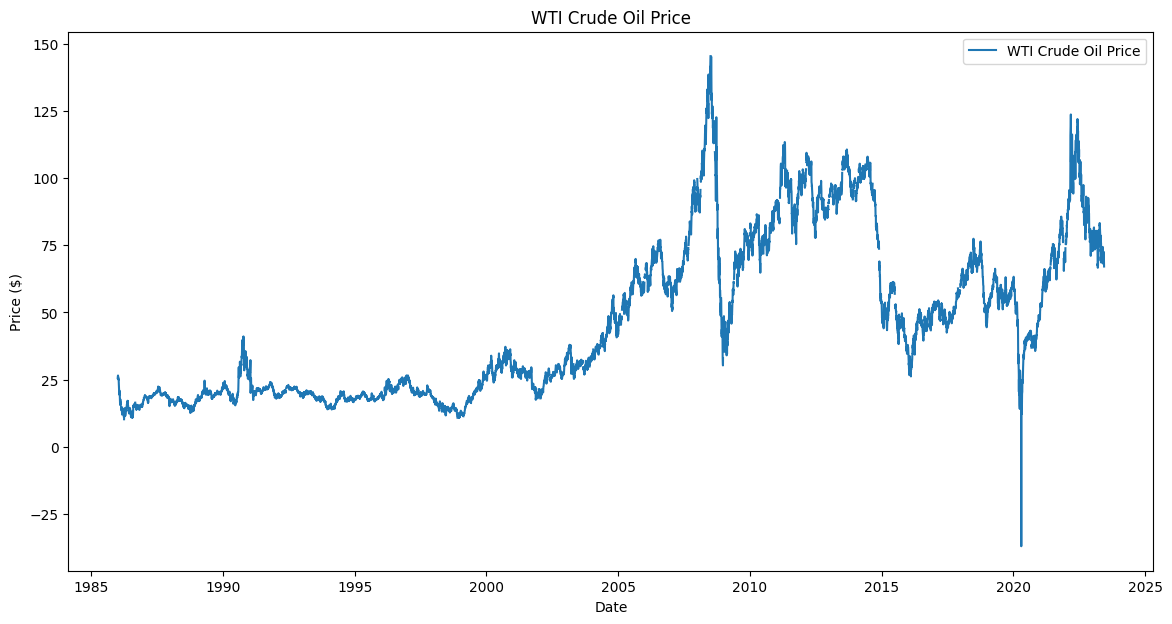

C:\Users\mehdi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


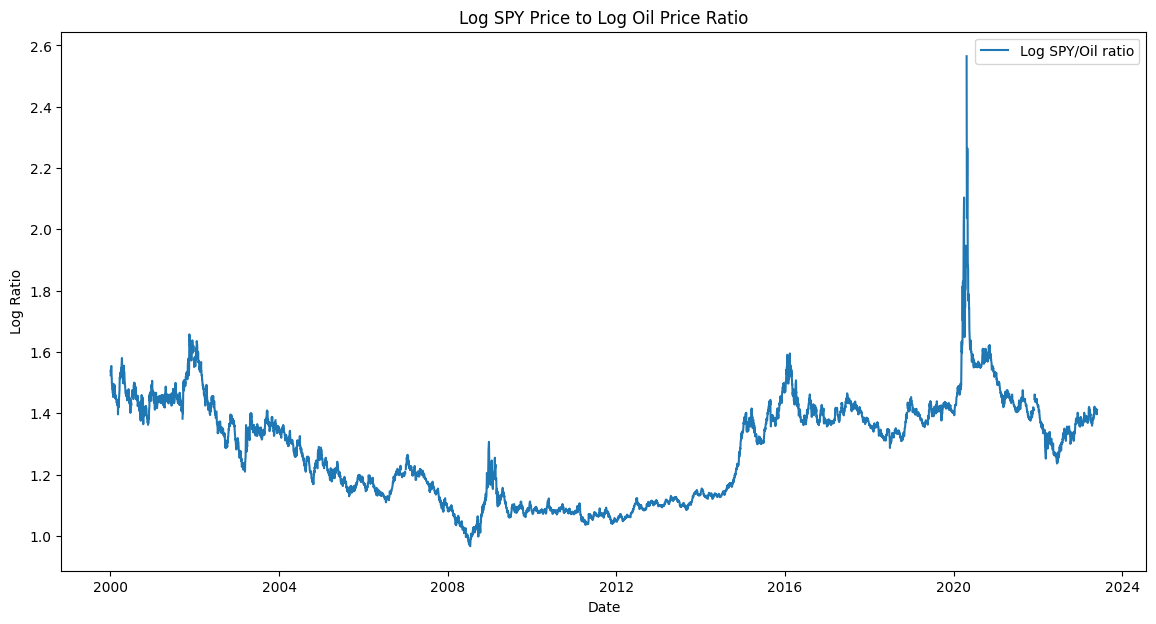

Intercept: -225.11546563881907
Slope: 0.00030666108246894737


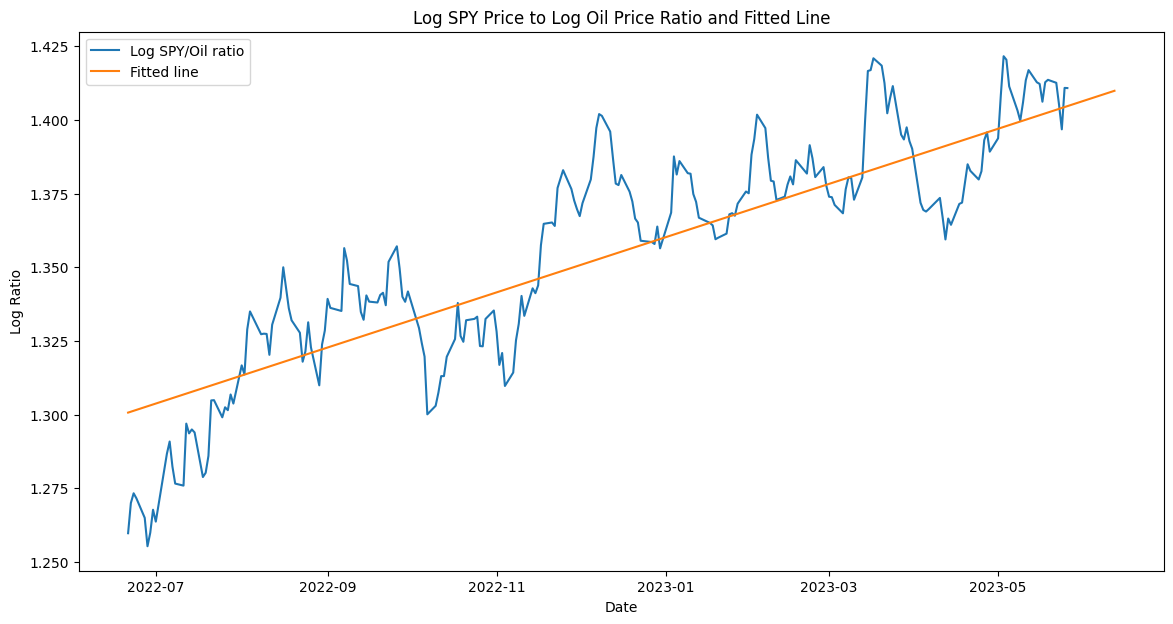

Intercept: -1.0285872881762044
Slope: 3.3147475134852064e-06


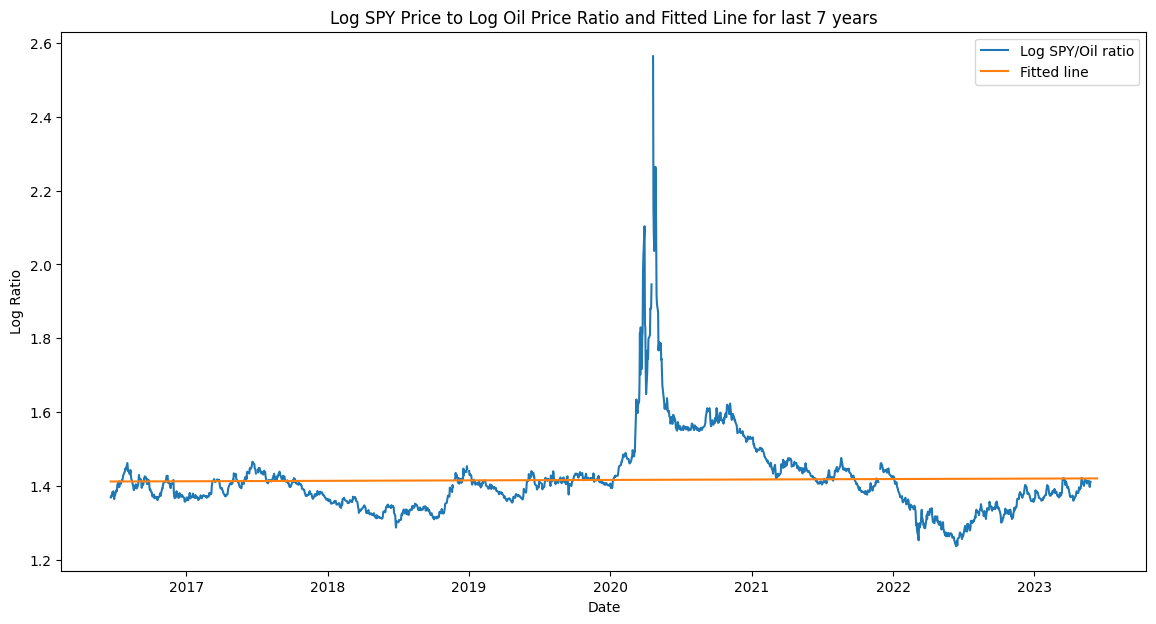

C:\Users\mehdi\AppData\Local\Temp\ipykernel_3204\1640408456.py:147: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  indicator = pd.Series(index=spy_oil_log_ratio.index)


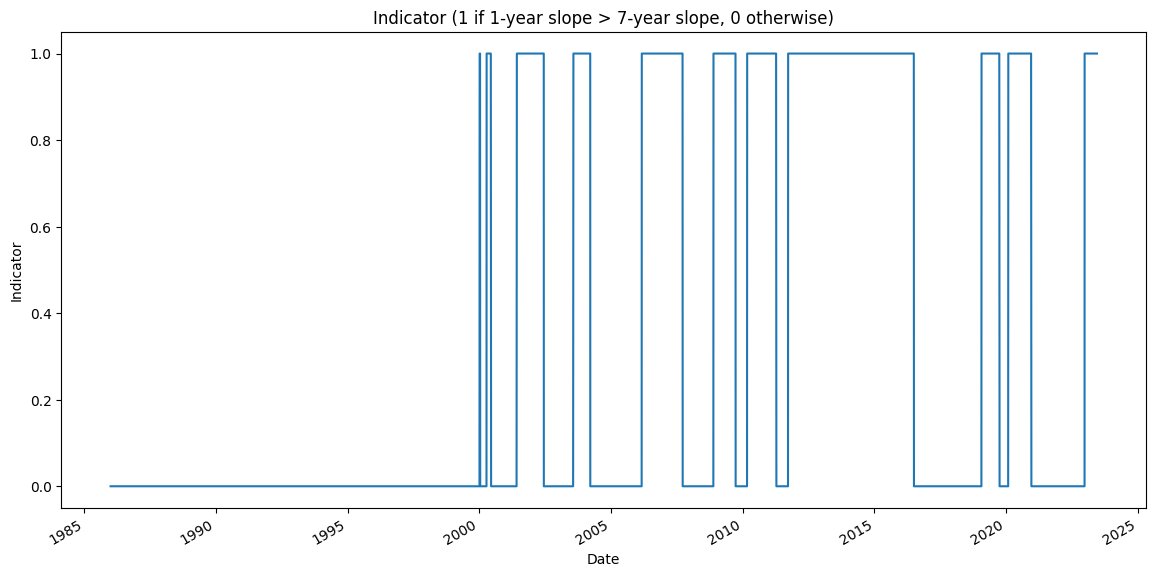

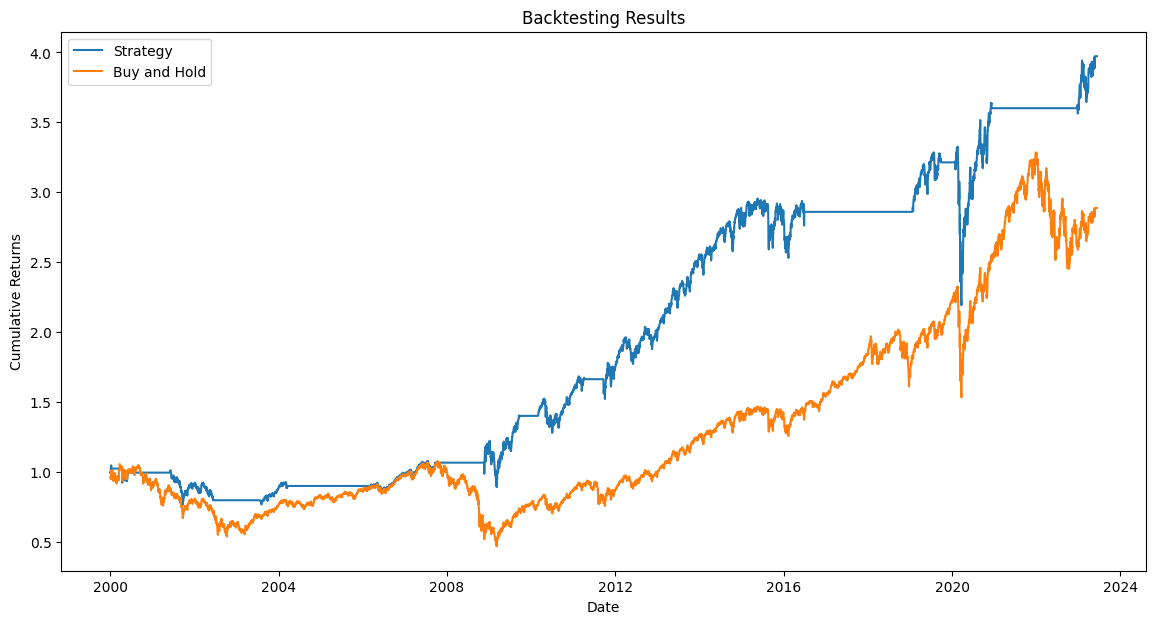

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from fredapi import Fred
import numpy as np
from pandas.tseries.offsets import DateOffset
from sklearn.linear_model import LinearRegression



# Fetch SPY data
spy = yf.download('SPY', start='2000-01-01', end='2023-05-29')
spy_close = spy['Close']

# Plot SPY data
plt.figure(figsize=(14, 7))
plt.plot(spy_close.index, spy_close, label='SPY')
plt.title('SPY Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.legend()
plt.show()

# Replace 'my_api_key' with your actual FRED API key
fred = Fred(api_key='2f15c96b46530fde1b1992a64c64650e')

# Fetch WTI Crude Oil Price data
oil_price = fred.get_series('DCOILWTICO')

# Plot oil price data
plt.figure(figsize=(14, 7))
plt.plot(oil_price.index, oil_price, label='WTI Crude Oil Price')
plt.title('WTI Crude Oil Price')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


# Remove or fill in missing values
spy_close = spy_close.dropna()
oil_price = oil_price.dropna()

# Replace zero values (if any exist)
spy_close = spy_close.replace(0, np.nan)
oil_price = oil_price.replace(0, np.nan)

# Calculate the logarithms
spy_log = np.log(spy_close)
oil_log = np.log(oil_price)

# Remove any new NaN values that might have been created
spy_log = spy_log.dropna()
oil_log = oil_log.dropna()

spy_oil_log_ratio = (spy_log / oil_log)


# Plot the log price ratio
plt.figure(figsize=(14, 7))
plt.plot(spy_oil_log_ratio.index, spy_oil_log_ratio, label='Log SPY/Oil ratio')
plt.title('Log SPY Price to Log Oil Price Ratio')
plt.xlabel('Date')
plt.ylabel('Log Ratio')
plt.legend()
plt.show()


# Get the last year of ratio data
one_year_ago = pd.Timestamp('2023-06-19') - DateOffset(years=1)
last_year_log_ratio = spy_oil_log_ratio[spy_oil_log_ratio.index >= one_year_ago]

# Define a function to convert date to ordinal
def convert_date_to_ordinal(date):
    return date.toordinal()

# Convert index to a numeric format for regression
X = np.array(last_year_log_ratio.index.map(convert_date_to_ordinal)).reshape(-1, 1)
y = last_year_log_ratio.values


# Handle missing values in y by filling them in with the mean value
y = pd.Series(y).fillna(pd.Series(y).mean()).values

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Print out the coefficients
print('Intercept:', model.intercept_)
print('Slope:', model.coef_[0])

# Plot the data and the fitted line
plt.figure(figsize=(14, 7))
plt.plot(last_year_log_ratio.index, last_year_log_ratio.values, label='Log SPY/Oil ratio')
plt.plot(last_year_log_ratio.index, model.predict(X), label='Fitted line')
plt.title('Log SPY Price to Log Oil Price Ratio and Fitted Line')
plt.xlabel('Date')
plt.ylabel('Log Ratio')
plt.legend()
plt.show()


# Get the last 7 years of ratio data
seven_years_ago = pd.Timestamp('2023-06-19') - DateOffset(years=7)
last_seven_years_log_ratio = spy_oil_log_ratio[spy_oil_log_ratio.index >= seven_years_ago]

# Convert index to a numeric format for regression
X = np.array(last_seven_years_log_ratio.index.map(convert_date_to_ordinal)).reshape(-1, 1)
y = last_seven_years_log_ratio.values

# Handle missing values in y by filling them in with the mean value
y = pd.Series(y).fillna(pd.Series(y).mean()).values

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Print out the coefficients
print('Intercept:', model.intercept_)
print('Slope:', model.coef_[0])

# Plot the data and the fitted line
plt.figure(figsize=(14, 7))
plt.plot(last_seven_years_log_ratio.index, last_seven_years_log_ratio.values, label='Log SPY/Oil ratio')
plt.plot(last_seven_years_log_ratio.index, model.predict(X), label='Fitted line')
plt.title('Log SPY Price to Log Oil Price Ratio and Fitted Line for last 7 years')
plt.xlabel('Date')
plt.ylabel('Log Ratio')
plt.legend()
plt.show()




import numpy as np
from sklearn.linear_model import LinearRegression
from pandas.tseries.offsets import DateOffset

def calculate_slope(X, y):
    """Fit a linear regression model and return the slope"""
    model = LinearRegression()
    model.fit(X, y)
    return model.coef_[0]

# Initialize the indicator series
indicator = pd.Series(index=spy_oil_log_ratio.index)

# Compute the 1-year and 7-year slopes for each day
for date in spy_oil_log_ratio.index:
    # Compute the 1-year slope
    one_year_ago = date - DateOffset(years=1)
    last_year_log_ratio = spy_oil_log_ratio[(spy_oil_log_ratio.index >= one_year_ago) & (spy_oil_log_ratio.index < date)]
    if not last_year_log_ratio.empty:
        X1 = np.array(last_year_log_ratio.index.map(convert_date_to_ordinal)).reshape(-1, 1)
        y1 = last_year_log_ratio.values
        if pd.Series(y1).isna().all():
            y1 = pd.Series(y1).fillna(0).values  # or use another default value
        else:
            y1 = pd.Series(y1).fillna(pd.Series(y1).mean()).values
        one_year_slope = calculate_slope(X1, y1)
        
            # Compute the 7-year slope
        seven_years_ago = date - DateOffset(years=7)
        last_seven_years_log_ratio = spy_oil_log_ratio[(spy_oil_log_ratio.index >= seven_years_ago) & (spy_oil_log_ratio.index < date)]
        if not last_seven_years_log_ratio.empty:
            X7 = np.array(last_seven_years_log_ratio.index.map(convert_date_to_ordinal)).reshape(-1, 1)
            y7 = last_seven_years_log_ratio.values
            if pd.Series(y7).isna().all():  # Use y7 here instead of y1
                y7 = pd.Series(y7).fillna(0).values  # or use another default value
            else:
                y7 = pd.Series(y7).fillna(pd.Series(y7).mean()).values  # Use y7 here instead of y1
            seven_years_slope = calculate_slope(X7, y7)

            # Set the indicator
            indicator[date] = int(one_year_slope > seven_years_slope)

# Plot the indicator
plt.figure(figsize=(14, 7))
indicator.plot()
plt.title('Indicator (1 if 1-year slope > 7-year slope, 0 otherwise)')
plt.xlabel('Date')
plt.ylabel('Indicator')
plt.show()


# Add the backtesting code after the previous script

# Combine the SPY closing prices and the indicator into one DataFrame
spy_close = spy_close.reindex(spy_oil_log_ratio.index)
backtest_data = pd.DataFrame({'spy_close': spy_close, 'indicator': indicator})

# Forward fill missing values in the SPY closing prices
backtest_data['spy_close'].fillna(method='ffill', inplace=True)

# Calculate the daily returns
backtest_data['daily_returns'] = backtest_data['spy_close'].pct_change() * backtest_data['indicator']

# Calculate the cumulative returns
backtest_data['cumulative_returns'] = (1 + backtest_data['daily_returns']).cumprod()

# Calculate the cumulative returns for buy and hold strategy for comparison
backtest_data['buy_and_hold_returns'] = (1 + backtest_data['spy_close'].pct_change()).cumprod()

# Plot the backtesting results
plt.figure(figsize=(14, 7))
plt.plot(backtest_data['cumulative_returns'], label='Strategy')
plt.plot(backtest_data['buy_and_hold_returns'], label='Buy and Hold')
plt.title('Backtesting Results')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed


C:\Users\mehdi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\mehdi\AppData\Local\Temp\ipykernel_3204\1031972027.py:52: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  indicator = pd.Series(index=spy_oil_log_ratio.index)


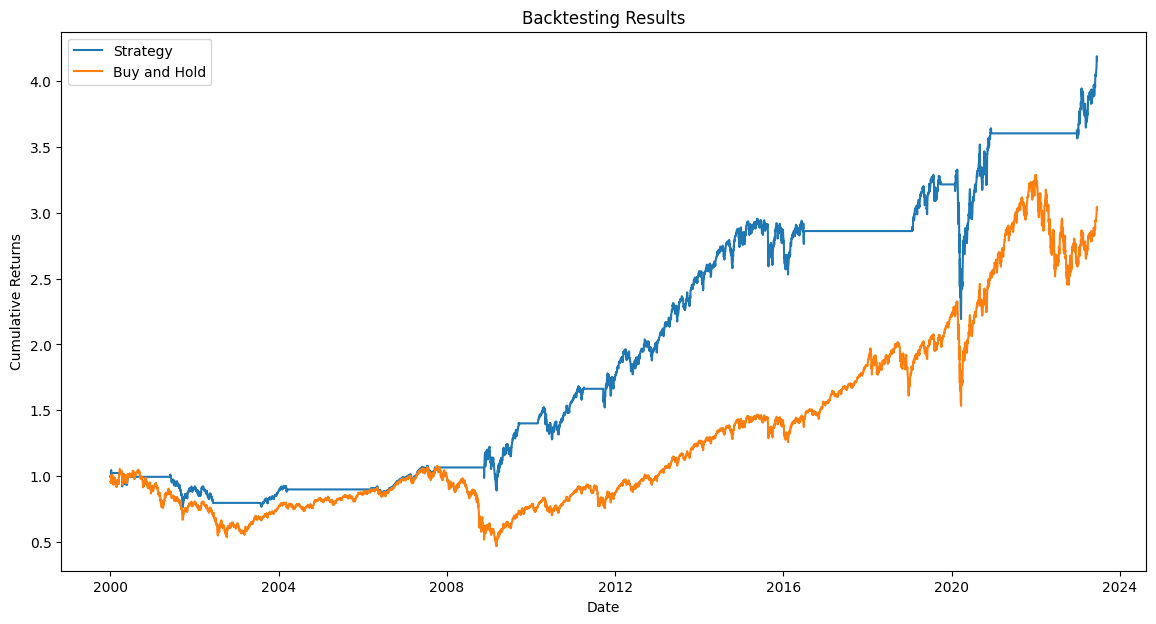

In [3]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from fredapi import Fred
import numpy as np
from pandas.tseries.offsets import DateOffset
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from pandas.tseries.offsets import DateOffset

# Define a function to convert date to ordinal
def convert_date_to_ordinal(date):
    return date.toordinal()

# Fetch SPY data
spy = yf.download('SPY', start='2000-01-01', end='2023-06-19')
spy_close = spy['Close']

# Replace 'my_api_key' with your actual FRED API key
fred = Fred(api_key='2f15c96b46530fde1b1992a64c64650e')

# Fetch WTI Crude Oil Price data
oil_price = fred.get_series('DCOILWTICO')

# Remove or fill in missing values
spy_close = spy_close.dropna()
oil_price = oil_price.dropna()

# Replace zero values (if any exist)
spy_close = spy_close.replace(0, np.nan)
oil_price = oil_price.replace(0, np.nan)

# Calculate the logarithms
spy_log = np.log(spy_close)
oil_log = np.log(oil_price)

# Remove any new NaN values that might have been created
spy_log = spy_log.dropna()
oil_log = oil_log.dropna()

spy_oil_log_ratio = (spy_log / oil_log)


def calculate_slope(X, y):
    """Fit a linear regression model and return the slope"""
    model = LinearRegression()
    model.fit(X, y)
    return model.coef_[0]

# Initialize the indicator series
indicator = pd.Series(index=spy_oil_log_ratio.index)

# Compute the 1-year and 7-year slopes for each day
for date in spy_oil_log_ratio.index:
    # Compute the 1-year slope
    one_year_ago = date - DateOffset(years=1)
    last_year_log_ratio = spy_oil_log_ratio[(spy_oil_log_ratio.index >= one_year_ago) & (spy_oil_log_ratio.index < date)]
    if not last_year_log_ratio.empty:
        X1 = np.array(last_year_log_ratio.index.map(convert_date_to_ordinal)).reshape(-1, 1)
        y1 = last_year_log_ratio.values
        if pd.Series(y1).isna().all():
            y1 = pd.Series(y1).fillna(0).values  # or use another default value
        else:
            y1 = pd.Series(y1).fillna(pd.Series(y1).mean()).values
        one_year_slope = calculate_slope(X1, y1)
        
            # Compute the 7-year slope
        seven_years_ago = date - DateOffset(years=7)
        last_seven_years_log_ratio = spy_oil_log_ratio[(spy_oil_log_ratio.index >= seven_years_ago) & (spy_oil_log_ratio.index < date)]
        if not last_seven_years_log_ratio.empty:
            X7 = np.array(last_seven_years_log_ratio.index.map(convert_date_to_ordinal)).reshape(-1, 1)
            y7 = last_seven_years_log_ratio.values
            if pd.Series(y7).isna().all():  # Use y7 here instead of y1
                y7 = pd.Series(y7).fillna(0).values  # or use another default value
            else:
                y7 = pd.Series(y7).fillna(pd.Series(y7).mean()).values  # Use y7 here instead of y1
            seven_years_slope = calculate_slope(X7, y7)

            # Set the indicator
            indicator[date] = int(one_year_slope > seven_years_slope)

# Add the backtesting code after the previous script

# Combine the SPY closing prices and the indicator into one DataFrame
spy_close = spy_close.reindex(spy_oil_log_ratio.index)
backtest_data = pd.DataFrame({'spy_close': spy_close, 'indicator': indicator})

# Forward fill missing values in the SPY closing prices
backtest_data['spy_close'].fillna(method='ffill', inplace=True)

# Calculate the daily returns
backtest_data['daily_returns'] = backtest_data['spy_close'].pct_change() * backtest_data['indicator']

# Calculate the cumulative returns
backtest_data['cumulative_returns'] = (1 + backtest_data['daily_returns']).cumprod()

# Calculate the cumulative returns for buy and hold strategy for comparison
backtest_data['buy_and_hold_returns'] = (1 + backtest_data['spy_close'].pct_change()).cumprod()

# Plot the backtesting results
plt.figure(figsize=(14, 7))
plt.plot(backtest_data['cumulative_returns'], label='Strategy')
plt.plot(backtest_data['buy_and_hold_returns'], label='Buy and Hold')
plt.title('Backtesting Results')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed


C:\Users\mehdi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\mehdi\AppData\Local\Temp\ipykernel_3204\3010686605.py:52: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  indicator = pd.Series(index=spy_oil_log_ratio.index)


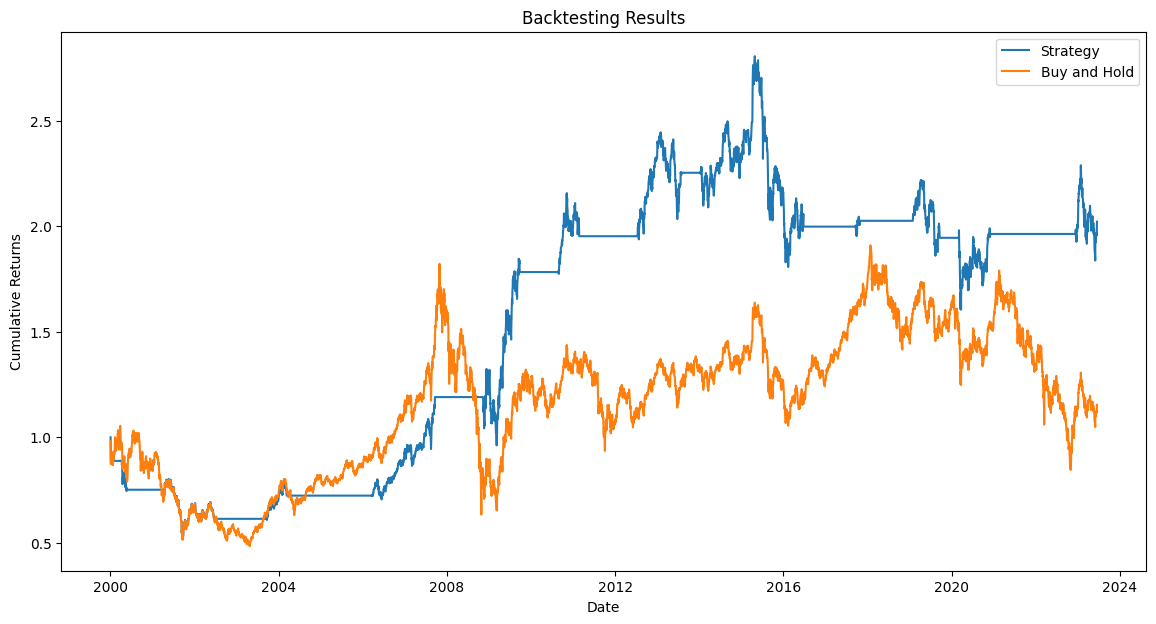

In [7]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from fredapi import Fred
import numpy as np
from pandas.tseries.offsets import DateOffset
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from pandas.tseries.offsets import DateOffset

# Define a function to convert date to ordinal
def convert_date_to_ordinal(date):
    return date.toordinal()

# Fetch SPY data
spy = yf.download('^HSI', start='2000-01-01', end='2023-06-19')
spy_close = spy['Close']

# Replace 'my_api_key' with your actual FRED API key
fred = Fred(api_key='2f15c96b46530fde1b1992a64c64650e')

# Fetch WTI Crude Oil Price data
oil_price = fred.get_series('DCOILWTICO')

# Remove or fill in missing values
spy_close = spy_close.dropna()
oil_price = oil_price.dropna()

# Replace zero values (if any exist)
spy_close = spy_close.replace(0, np.nan)
oil_price = oil_price.replace(0, np.nan)

# Calculate the logarithms
spy_log = np.log(spy_close)
oil_log = np.log(oil_price)

# Remove any new NaN values that might have been created
spy_log = spy_log.dropna()
oil_log = oil_log.dropna()

spy_oil_log_ratio = (spy_log / oil_log)


def calculate_slope(X, y):
    """Fit a linear regression model and return the slope"""
    model = LinearRegression()
    model.fit(X, y)
    return model.coef_[0]

# Initialize the indicator series
indicator = pd.Series(index=spy_oil_log_ratio.index)

# Compute the 1-year and 7-year slopes for each day
for date in spy_oil_log_ratio.index:
    # Compute the 1-year slope
    one_year_ago = date - DateOffset(years=1)
    last_year_log_ratio = spy_oil_log_ratio[(spy_oil_log_ratio.index >= one_year_ago) & (spy_oil_log_ratio.index < date)]
    if not last_year_log_ratio.empty:
        X1 = np.array(last_year_log_ratio.index.map(convert_date_to_ordinal)).reshape(-1, 1)
        y1 = last_year_log_ratio.values
        if pd.Series(y1).isna().all():
            y1 = pd.Series(y1).fillna(0).values  # or use another default value
        else:
            y1 = pd.Series(y1).fillna(pd.Series(y1).mean()).values
        one_year_slope = calculate_slope(X1, y1)
        
            # Compute the 7-year slope
        seven_years_ago = date - DateOffset(years=7)
        last_seven_years_log_ratio = spy_oil_log_ratio[(spy_oil_log_ratio.index >= seven_years_ago) & (spy_oil_log_ratio.index < date)]
        if not last_seven_years_log_ratio.empty:
            X7 = np.array(last_seven_years_log_ratio.index.map(convert_date_to_ordinal)).reshape(-1, 1)
            y7 = last_seven_years_log_ratio.values
            if pd.Series(y7).isna().all():  # Use y7 here instead of y1
                y7 = pd.Series(y7).fillna(0).values  # or use another default value
            else:
                y7 = pd.Series(y7).fillna(pd.Series(y7).mean()).values  # Use y7 here instead of y1
            seven_years_slope = calculate_slope(X7, y7)

            # Set the indicator
            indicator[date] = int(one_year_slope > seven_years_slope)

# Add the backtesting code after the previous script

# Combine the SPY closing prices and the indicator into one DataFrame
spy_close = spy_close.reindex(spy_oil_log_ratio.index)
backtest_data = pd.DataFrame({'spy_close': spy_close, 'indicator': indicator})

# Forward fill missing values in the SPY closing prices
backtest_data['spy_close'].fillna(method='ffill', inplace=True)

# Calculate the daily returns
backtest_data['daily_returns'] = backtest_data['spy_close'].pct_change() * backtest_data['indicator']

# Calculate the cumulative returns
backtest_data['cumulative_returns'] = (1 + backtest_data['daily_returns']).cumprod()

# Calculate the cumulative returns for buy and hold strategy for comparison
backtest_data['buy_and_hold_returns'] = (1 + backtest_data['spy_close'].pct_change()).cumprod()

# Plot the backtesting results
plt.figure(figsize=(14, 7))
plt.plot(backtest_data['cumulative_returns'], label='Strategy')
plt.plot(backtest_data['buy_and_hold_returns'], label='Buy and Hold')
plt.title('Backtesting Results')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\mehdi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\mehdi\AppData\Local\Temp\ipykernel_3204\1518196665.py:54: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  indicator = pd.Series(index=index_oil_log_ratio.index)


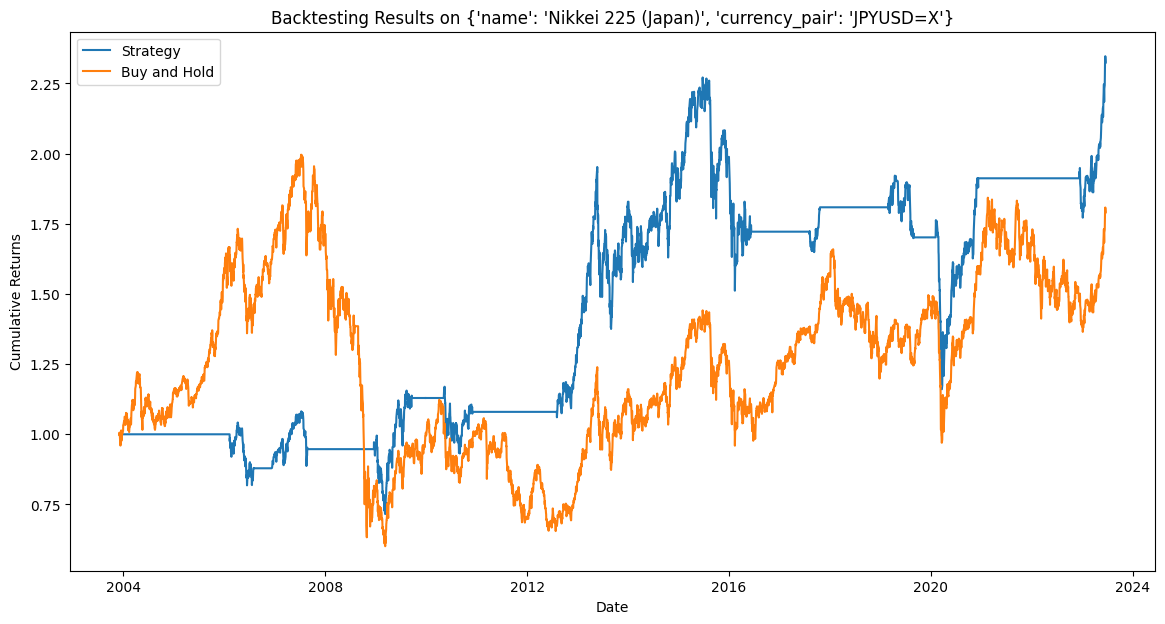

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\mehdi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\mehdi\AppData\Local\Temp\ipykernel_3204\1518196665.py:54: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  indicator = pd.Series(index=index_oil_log_ratio.index)


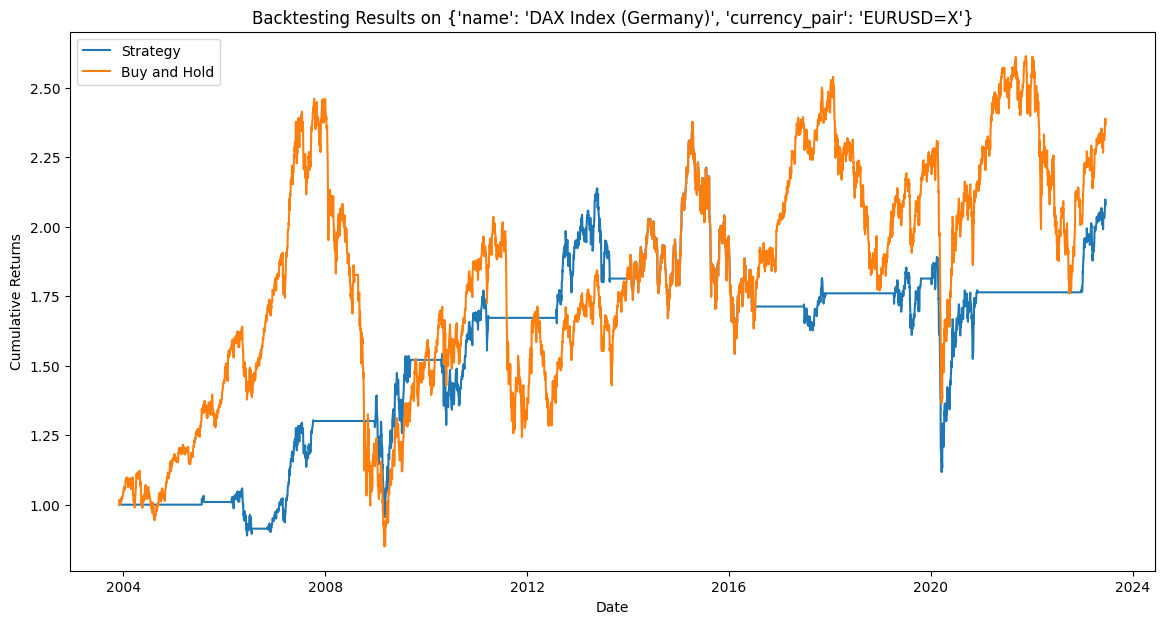

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\mehdi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\mehdi\AppData\Local\Temp\ipykernel_3204\1518196665.py:54: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  indicator = pd.Series(index=index_oil_log_ratio.index)


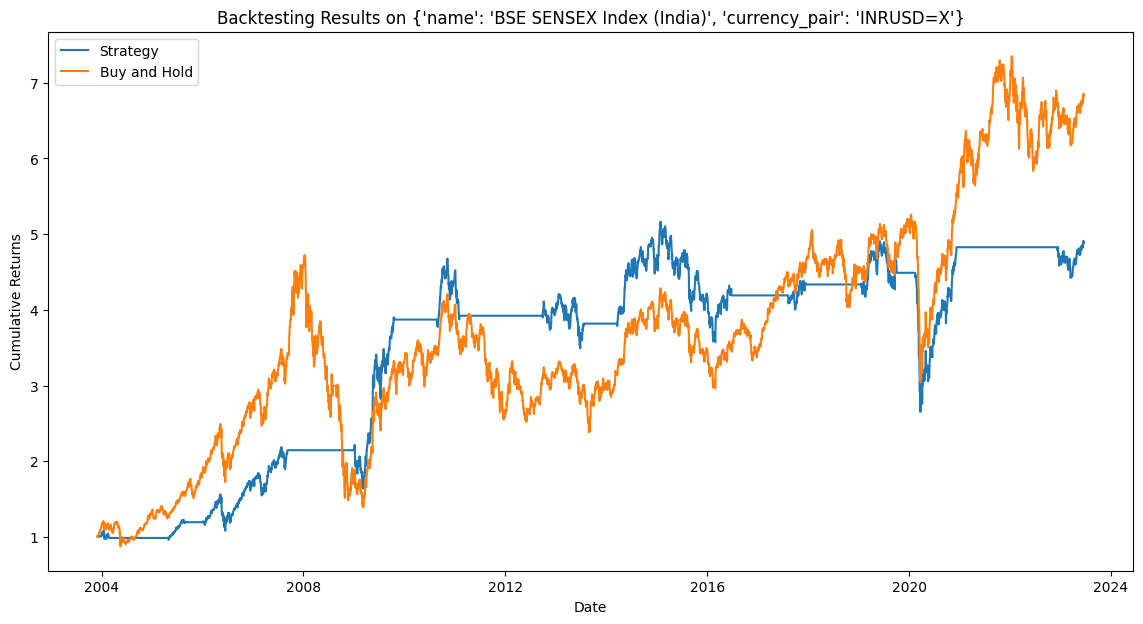

In [12]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from fredapi import Fred
from pandas.tseries.offsets import DateOffset
from sklearn.linear_model import LinearRegression


# Define a function to convert date to ordinal
def convert_date_to_ordinal(date):
    return date.toordinal()


def calculate_slope(X, y):
    """Fit a linear regression model and return the slope"""
    model = LinearRegression()
    model.fit(X, y)
    return model.coef_[0]


# Replace 'my_api_key' with your actual FRED API key
fred = Fred(api_key='2f15c96b46530fde1b1992a64c64650e')

# Fetch WTI Crude Oil Price data for the year 2010 to 2020
oil_price = fred.get_series('DCOILWTICO', start='2000-01-01')

# List of ticker symbols for the indexes
indexes = {
    '^N225': {'name': 'Nikkei 225 (Japan)', 'currency_pair': 'JPYUSD=X'},
    '^GDAXI': {'name': 'DAX Index (Germany)', 'currency_pair': 'EURUSD=X'},
    '^BSESN': {'name': 'BSE SENSEX Index (India)', 'currency_pair': 'INRUSD=X'}
}
# Loop through each index
for ticker, index_name in indexes.items():

    # Fetch index data for the year 2010 to 2020
    index_data = yf.download(ticker, start='2000-01-01')
    currency_data = yf.download(index_info['currency_pair'], start='2000-01-01')
    # Convert the index prices to USD
    index_data['Adj Close USD'] = index_data['Adj Close'] * currency_data['Adj Close']

    # Calculate the logarithms
    index_log = np.log(index_data['Adj Close USD'])
    oil_log = np.log(oil_price)

    # Remove any new NaN values that might have been created
    index_log = index_log.dropna()
    oil_log = oil_log.dropna()

    index_oil_log_ratio = (index_log / oil_log)

    # Initialize the indicator series
    indicator = pd.Series(index=index_oil_log_ratio.index)

    # Compute the 1-year and 7-year slopes for each day
    for date in index_oil_log_ratio.index:
        # Compute the 1-year slope
        one_year_ago = date - DateOffset(years=1)
        last_year_log_ratio = index_oil_log_ratio[
            (index_oil_log_ratio.index >= one_year_ago) & (index_oil_log_ratio.index < date)]
        if not last_year_log_ratio.empty:
            X1 = np.array(last_year_log_ratio.index.map(convert_date_to_ordinal)).reshape(-1, 1)
            y1 = last_year_log_ratio.values
            if pd.Series(y1).isna().all():
                y1 = pd.Series(y1).fillna(0).values
            else:
                y1 = pd.Series(y1).fillna(pd.Series(y1).mean()).values
            one_year_slope = calculate_slope(X1, y1)

            # Compute the 7-year slope
            seven_years_ago = date - DateOffset(years=7)
            last_seven_years_log_ratio = index_oil_log_ratio[
                (index_oil_log_ratio.index >= seven_years_ago) & (index_oil_log_ratio.index < date)]
            if not last_seven_years_log_ratio.empty:
                X7 = np.array(last_seven_years_log_ratio.index.map(convert_date_to_ordinal)).reshape(-1, 1)
                y7 = last_seven_years_log_ratio.values
                if pd.Series(y7).isna().all():
                    y7 = pd.Series(y7).fillna(0).values
                else:
                    y7 = pd.Series(y7).fillna(pd.Series(y7).mean()).values
                seven_years_slope = calculate_slope(X7, y7)

                # Set the indicator
                indicator[date] = int(one_year_slope > seven_years_slope)

    # Combine the index closing prices and the indicator into one DataFrame
    index_data['Adj Close USD'] = index_data['Adj Close USD'].reindex(index_oil_log_ratio.index)
    backtest_data = pd.DataFrame({'index_close': index_data['Adj Close USD'], 'indicator': indicator})

    # Forward fill missing values in the index closing prices
    backtest_data['index_close'].fillna(method='ffill', inplace=True)

    # Calculate the daily returns
    backtest_data['daily_returns'] = backtest_data['index_close'].pct_change() * backtest_data['indicator']

    # Calculate the cumulative returns
    backtest_data['cumulative_returns'] = (1 + backtest_data['daily_returns']).cumprod()

    # Calculate the cumulative returns for buy and hold strategy for comparison
    backtest_data['buy_and_hold_returns'] = (1 + backtest_data['index_close'].pct_change()).cumprod()

    # Plot the backtesting results
    plt.figure(figsize=(14, 7))
    plt.plot(backtest_data['cumulative_returns'], label='Strategy')
    plt.plot(backtest_data['buy_and_hold_returns'], label='Buy and Hold')
    plt.title(f'Backtesting Results on {index_name}')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.show()


[*********************100%***********************]  1 of 1 completed


C:\Users\mehdi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\mehdi\AppData\Local\Temp\ipykernel_2940\2232938781.py:52: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  indicator = pd.Series(index=spy_oil_log_ratio.index)


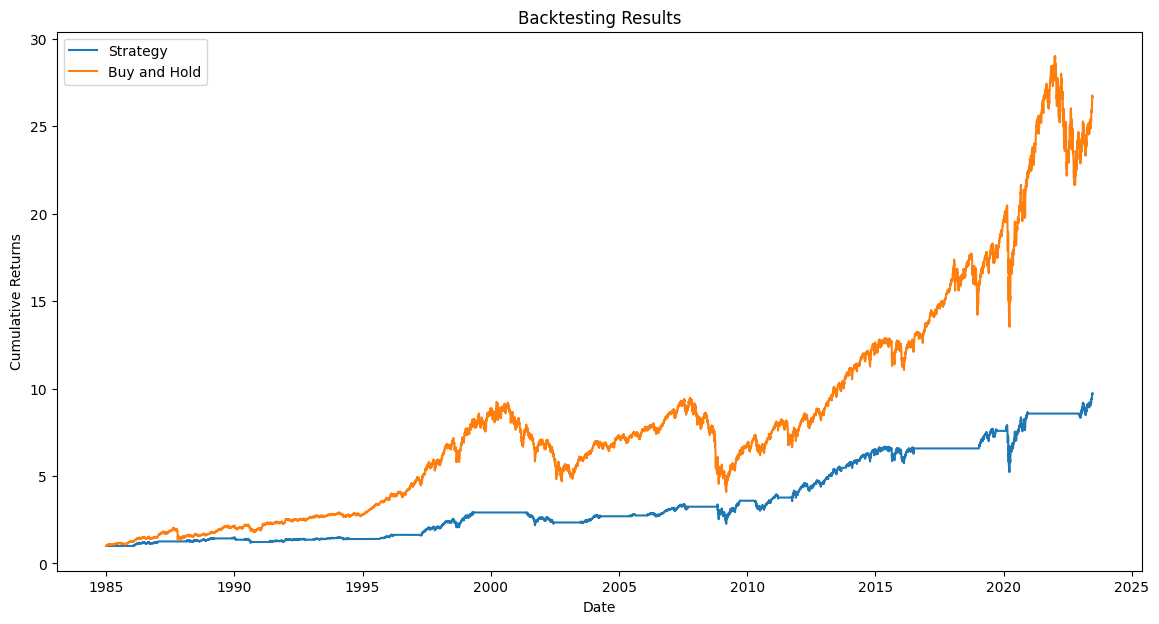

In [2]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from fredapi import Fred
import numpy as np
from pandas.tseries.offsets import DateOffset
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from pandas.tseries.offsets import DateOffset

# Define a function to convert date to ordinal
def convert_date_to_ordinal(date):
    return date.toordinal()

# Fetch SPY data
spy = yf.download('^GSPC', start='1985-01-01', end='2023-06-19')
spy_close = spy['Close']

# Replace 'my_api_key' with your actual FRED API key
fred = Fred(api_key='2f15c96b46530fde1b1992a64c64650e')

# Fetch WTI Crude Oil Price data
oil_price = fred.get_series('DCOILWTICO')

# Remove or fill in missing values
spy_close = spy_close.dropna()
oil_price = oil_price.dropna()

# Replace zero values (if any exist)
spy_close = spy_close.replace(0, np.nan)
oil_price = oil_price.replace(0, np.nan)

# Calculate the logarithms
spy_log = np.log(spy_close)
oil_log = np.log(oil_price)

# Remove any new NaN values that might have been created
spy_log = spy_log.dropna()
oil_log = oil_log.dropna()

spy_oil_log_ratio = (spy_log / oil_log)


def calculate_slope(X, y):
    """Fit a linear regression model and return the slope"""
    model = LinearRegression()
    model.fit(X, y)
    return model.coef_[0]

# Initialize the indicator series
indicator = pd.Series(index=spy_oil_log_ratio.index)

# Compute the 1-year and 7-year slopes for each day
for date in spy_oil_log_ratio.index:
    # Compute the 1-year slope
    one_year_ago = date - DateOffset(years=1)
    last_year_log_ratio = spy_oil_log_ratio[(spy_oil_log_ratio.index >= one_year_ago) & (spy_oil_log_ratio.index < date)]
    if not last_year_log_ratio.empty:
        X1 = np.array(last_year_log_ratio.index.map(convert_date_to_ordinal)).reshape(-1, 1)
        y1 = last_year_log_ratio.values
        if pd.Series(y1).isna().all():
            y1 = pd.Series(y1).fillna(0).values  # or use another default value
        else:
            y1 = pd.Series(y1).fillna(pd.Series(y1).mean()).values
        one_year_slope = calculate_slope(X1, y1)
        
            # Compute the 7-year slope
        seven_years_ago = date - DateOffset(years=7)
        last_seven_years_log_ratio = spy_oil_log_ratio[(spy_oil_log_ratio.index >= seven_years_ago) & (spy_oil_log_ratio.index < date)]
        if not last_seven_years_log_ratio.empty:
            X7 = np.array(last_seven_years_log_ratio.index.map(convert_date_to_ordinal)).reshape(-1, 1)
            y7 = last_seven_years_log_ratio.values
            if pd.Series(y7).isna().all():  # Use y7 here instead of y1
                y7 = pd.Series(y7).fillna(0).values  # or use another default value
            else:
                y7 = pd.Series(y7).fillna(pd.Series(y7).mean()).values  # Use y7 here instead of y1
            seven_years_slope = calculate_slope(X7, y7)

            # Set the indicator
            indicator[date] = int(one_year_slope > seven_years_slope)

# Add the backtesting code after the previous script

# Combine the SPY closing prices and the indicator into one DataFrame
spy_close = spy_close.reindex(spy_oil_log_ratio.index)
backtest_data = pd.DataFrame({'spy_close': spy_close, 'indicator': indicator})

# Forward fill missing values in the SPY closing prices
backtest_data['spy_close'].fillna(method='ffill', inplace=True)

# Calculate the daily returns
backtest_data['daily_returns'] = backtest_data['spy_close'].pct_change() * backtest_data['indicator']

# Calculate the cumulative returns
backtest_data['cumulative_returns'] = (1 + backtest_data['daily_returns']).cumprod()

# Calculate the cumulative returns for buy and hold strategy for comparison
backtest_data['buy_and_hold_returns'] = (1 + backtest_data['spy_close'].pct_change()).cumprod()

# Plot the backtesting results
plt.figure(figsize=(14, 7))
plt.plot(backtest_data['cumulative_returns'], label='Strategy')
plt.plot(backtest_data['buy_and_hold_returns'], label='Buy and Hold')
plt.title('Backtesting Results')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed


C:\Users\mehdi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\mehdi\AppData\Local\Temp\ipykernel_2940\4266955382.py:52: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  indicator = pd.Series(index=spy_oil_log_ratio.index)


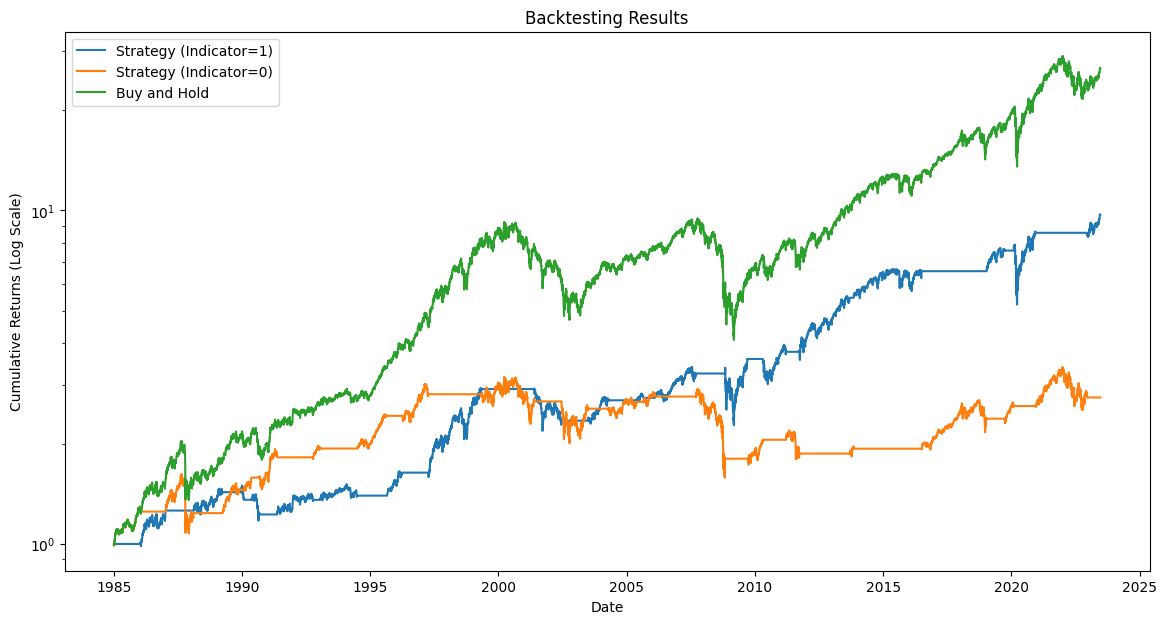

In [4]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from fredapi import Fred
from pandas.tseries.offsets import DateOffset
from sklearn.linear_model import LinearRegression


# Define a function to convert date to ordinal
def convert_date_to_ordinal(date):
    return date.toordinal()


# Fetch SPY data
spy = yf.download('^GSPC', start='1985-01-01', end='2023-06-19')
spy_close = spy['Close']

# Replace 'my_api_key' with your actual FRED API key
fred = Fred(api_key='2f15c96b46530fde1b1992a64c64650e')

# Fetch WTI Crude Oil Price data
oil_price = fred.get_series('DCOILWTICO')

# Remove or fill in missing values
spy_close = spy_close.dropna()
oil_price = oil_price.dropna()

# Replace zero values (if any exist)
spy_close = spy_close.replace(0, np.nan)
oil_price = oil_price.replace(0, np.nan)

# Calculate the logarithms
spy_log = np.log(spy_close)
oil_log = np.log(oil_price)

# Remove any new NaN values that might have been created
spy_log = spy_log.dropna()
oil_log = oil_log.dropna()

spy_oil_log_ratio = (spy_log / oil_log)


def calculate_slope(X, y):
    """Fit a linear regression model and return the slope"""
    model = LinearRegression()
    model.fit(X, y)
    return model.coef_[0]


# Initialize the indicator series
indicator = pd.Series(index=spy_oil_log_ratio.index)

# Compute the 1-year and 7-year slopes for each day
for date in spy_oil_log_ratio.index:
    # Compute the 1-year slope
    one_year_ago = date - DateOffset(years=1)
    last_year_log_ratio = spy_oil_log_ratio[
        (spy_oil_log_ratio.index >= one_year_ago) & (spy_oil_log_ratio.index < date)]
    if not last_year_log_ratio.empty:
        X1 = np.array(last_year_log_ratio.index.map(convert_date_to_ordinal)).reshape(-1, 1)
        y1 = last_year_log_ratio.values
        if pd.Series(y1).isna().all():
            y1 = pd.Series(y1).fillna(0).values
        else:
            y1 = pd.Series(y1).fillna(pd.Series(y1).mean()).values
        one_year_slope = calculate_slope(X1, y1)

        # Compute the 7-year slope
        seven_years_ago = date - DateOffset(years=7)
        last_seven_years_log_ratio = spy_oil_log_ratio[
            (spy_oil_log_ratio.index >= seven_years_ago) & (spy_oil_log_ratio.index < date)]
        if not last_seven_years_log_ratio.empty:
            X7 = np.array(last_seven_years_log_ratio.index.map(convert_date_to_ordinal)).reshape(-1, 1)
            y7 = last_seven_years_log_ratio.values
            if pd.Series(y7).isna().all():
                y7 = pd.Series(y7).fillna(0).values
            else:
                y7 = pd.Series(y7).fillna(pd.Series(y7).mean()).values
            seven_years_slope = calculate_slope(X7, y7)

            # Set the indicator
            indicator[date] = int(one_year_slope > seven_years_slope)

# Combine the SPY closing prices and the indicator into one DataFrame
spy_close = spy_close.reindex(spy_oil_log_ratio.index)
backtest_data = pd.DataFrame({'spy_close': spy_close, 'indicator': indicator})

# Forward fill missing values in the SPY closing prices
backtest_data['spy_close'].fillna(method='ffill', inplace=True)

# Calculate the daily returns when indicator is 1
backtest_data['daily_returns_1'] = backtest_data['spy_close'].pct_change() * (backtest_data['indicator'] == 1)

# Calculate the daily returns when indicator is 0
backtest_data['daily_returns_0'] = backtest_data['spy_close'].pct_change() * (backtest_data['indicator'] == 0)

# Calculate the cumulative returns when indicator is 1
backtest_data['cumulative_returns_1'] = (1 + backtest_data['daily_returns_1']).cumprod()

# Calculate the cumulative returns when indicator is 0
backtest_data['cumulative_returns_0'] = (1 + backtest_data['daily_returns_0']).cumprod()

# Calculate the cumulative returns for buy and hold strategy for comparison
backtest_data['buy_and_hold_returns'] = (1 + backtest_data['spy_close'].pct_change()).cumprod()

# Plot the backtesting results
plt.figure(figsize=(14, 7))
plt.plot(backtest_data['cumulative_returns_1'], label='Strategy (Indicator=1)')
plt.plot(backtest_data['cumulative_returns_0'], label='Strategy (Indicator=0)')
plt.plot(backtest_data['buy_and_hold_returns'], label='Buy and Hold')
plt.title('Backtesting Results')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns (Log Scale)')
plt.yscale('log')  # Setting y-axis to log scale
plt.legend()
plt.show()

[*********************100%***********************]  11 of 11 completed


C:\Users\mehdi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\mehdi\AppData\Local\Temp\ipykernel_308\1387986008.py:46: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  indicator = pd.Series(index=etf_oil_log_ratio.index)


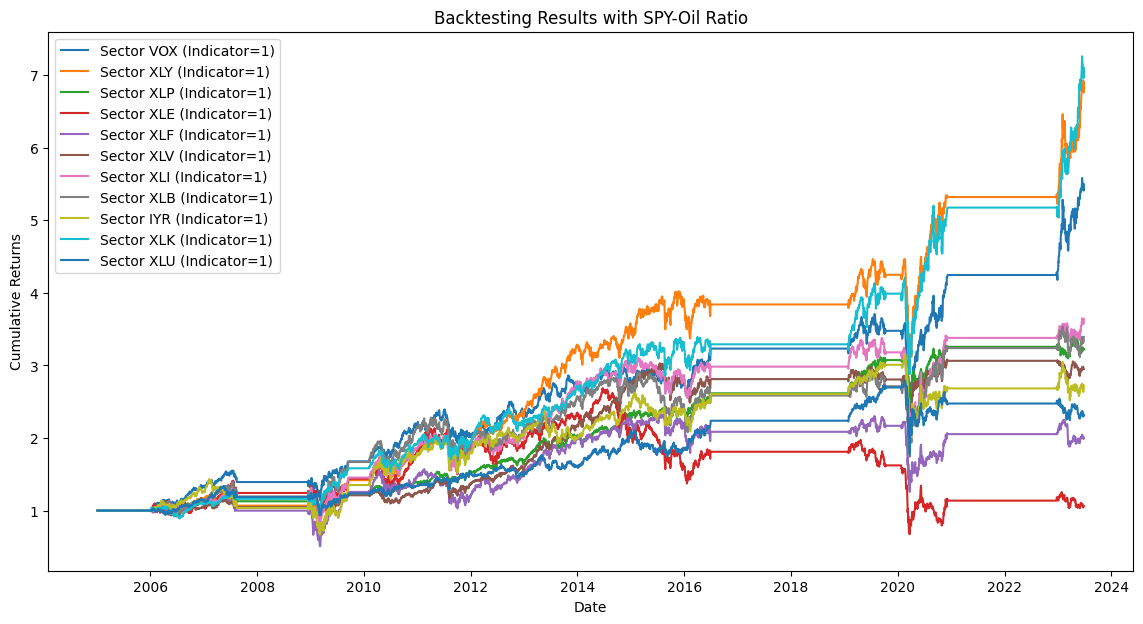

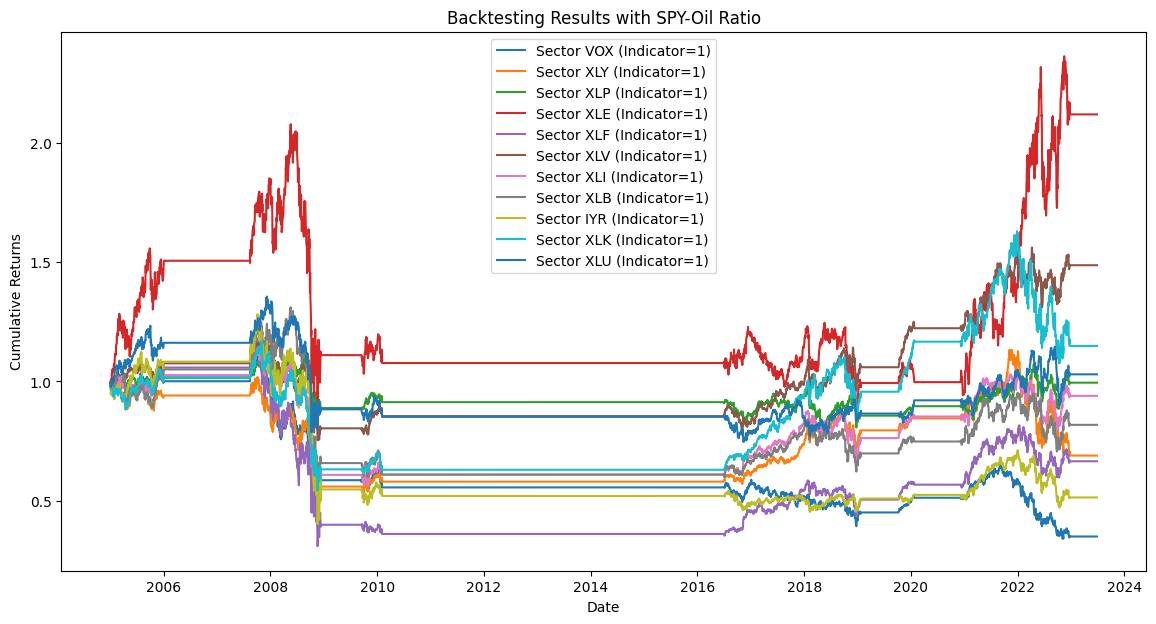

In [5]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from fredapi import Fred
from pandas.tseries.offsets import DateOffset
from sklearn.linear_model import LinearRegression


def convert_date_to_ordinal(date):
    return date.toordinal()


def calculate_slope(X, y):
    """Fit a linear regression model and return the slope"""
    model = LinearRegression()
    model.fit(X, y)
    return model.coef_[0]


# Define sector ETFs
sector_etfs = ["VOX", "XLY", "XLP", "XLE", "XLF", "XLV", "XLI", "XLB", "IYR", "XLK", "XLU"]

# Fetch ETF data
etfs_data = yf.download(sector_etfs, start='2005-01-01')
etf_close = etfs_data["Close"]

# Replace 'your_api_key' with your actual FRED API key
fred = Fred(api_key='2f15c96b46530fde1b1992a64c64650e')

# Fetch WTI Crude Oil Price data
oil_price = fred.get_series('DCOILWTICO')

# Remove or fill in missing values
etf_close = etf_close.dropna()
oil_price = oil_price.dropna()

# Calculate the logarithms
etf_log = np.log(etf_close)
oil_log = np.log(oil_price)

# Compute the ratio of the logarithm of ETF prices and oil price
etf_oil_log_ratio = (etf_log).div(oil_log, axis=0)

# Initialize the indicator series
indicator = pd.Series(index=etf_oil_log_ratio.index)

# Compute the 1-year and 7-year slopes for each day
for date in etf_oil_log_ratio.index:
    # Compute the 1-year slope
    one_year_ago = date - DateOffset(years=1)
    last_year_log_ratio = etf_oil_log_ratio[
        (etf_oil_log_ratio.index >= one_year_ago) & (etf_oil_log_ratio.index < date)]
    
    if not last_year_log_ratio.empty:
        X1 = np.array(last_year_log_ratio.index.map(convert_date_to_ordinal)).reshape(-1, 1)
        y1 = last_year_log_ratio.mean(axis=1).values

        # Handle NaN values
        valid_indices = ~np.isnan(y1)
        X1 = X1[valid_indices]
        y1 = y1[valid_indices]

        if len(y1) > 0:
            one_year_slope = calculate_slope(X1, y1)

            # Compute the 7-year slope
            seven_years_ago = date - DateOffset(years=7)
            last_seven_years_log_ratio = etf_oil_log_ratio[
                (etf_oil_log_ratio.index >= seven_years_ago) & (etf_oil_log_ratio.index < date)]
            
            if not last_seven_years_log_ratio.empty:
                X7 = np.array(last_seven_years_log_ratio.index.map(convert_date_to_ordinal)).reshape(-1, 1)
                y7 = last_seven_years_log_ratio.mean(axis=1).values

                # Handle NaN values
                valid_indices = ~np.isnan(y7)
                X7 = X7[valid_indices]
                y7 = y7[valid_indices]

                if len(y7) > 0:
                    seven_years_slope = calculate_slope(X7, y7)
                    # Set the indicator
                    indicator[date] = int(one_year_slope > seven_years_slope)

# Combine the ETF closing prices and the indicator into one DataFrame
etf_close = etf_close.reindex(etf_oil_log_ratio.index)
backtest_data = etf_close.copy()
backtest_data['indicator'] = indicator

# Calculate the daily returns when indicator is 1 for each sector
for sector in sector_etfs:
    backtest_data[f'daily_returns_1_{sector}'] = backtest_data[sector].pct_change() * (backtest_data['indicator'] == 1)

# Calculate the cumulative returns when indicator is 1 for each sector
plt.figure(figsize=(14, 7))

for sector in sector_etfs:
    backtest_data[f'cumulative_returns_1_{sector}'] = (1 + backtest_data[f'daily_returns_1_{sector}']).cumprod()
    plt.plot(backtest_data[f'cumulative_returns_1_{sector}'], label=f'Sector {sector} (Indicator=1)')

plt.title('Backtesting Results with SPY-Oil Ratio')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Calculate the daily returns when indicator is 0  for each sector
for sector in sector_etfs:
    backtest_data[f'daily_returns_1_{sector}'] = backtest_data[sector].pct_change() * (backtest_data['indicator'] == 0)

# Calculate the cumulative returns when indicator is 0 for each sector
plt.figure(figsize=(14, 7))

for sector in sector_etfs:
    backtest_data[f'cumulative_returns_1_{sector}'] = (1 + backtest_data[f'daily_returns_1_{sector}']).cumprod()
    plt.plot(backtest_data[f'cumulative_returns_1_{sector}'], label=f'Sector {sector} (Indicator=1)')

plt.title('Backtesting Results with SPY-Oil Ratio')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()


[*********************100%***********************]  11 of 11 completed


C:\Users\mehdi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\mehdi\AppData\Local\Temp\ipykernel_308\4057729786.py:59: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  indicator = pd.Series(index=etf_oil_log_ratio.index)


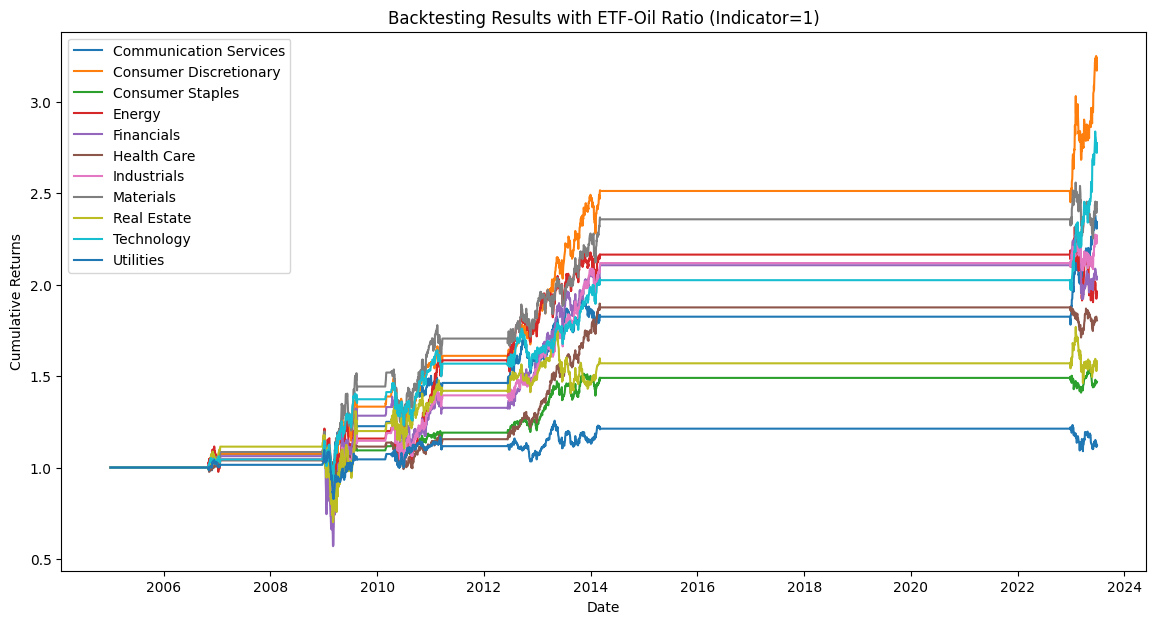

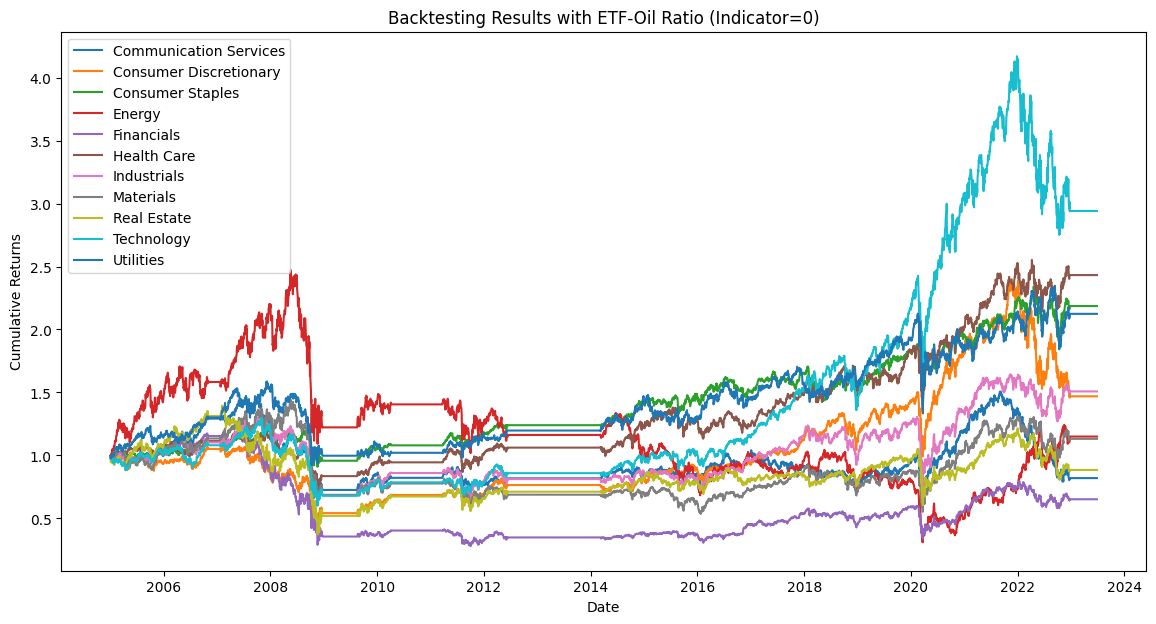

In [7]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from fredapi import Fred
from pandas.tseries.offsets import DateOffset
from sklearn.linear_model import LinearRegression


def convert_date_to_ordinal(date):
    return date.toordinal()


def calculate_slope(X, y):
    """Fit a linear regression model and return the slope"""
    model = LinearRegression()
    model.fit(X, y)
    return model.coef_[0]


# Define sector ETFs and their names
sector_etfs = ["VOX", "XLY", "XLP", "XLE", "XLF", "XLV", "XLI", "XLB", "IYR", "XLK", "XLU"]
sector_names = {
    "VOX": "Communication Services",
    "XLY": "Consumer Discretionary",
    "XLP": "Consumer Staples",
    "XLE": "Energy",
    "XLF": "Financials",
    "XLV": "Health Care",
    "XLI": "Industrials",
    "XLB": "Materials",
    "IYR": "Real Estate",
    "XLK": "Technology",
    "XLU": "Utilities"
}

# Fetch ETF data
etfs_data = yf.download(sector_etfs, start='2005-01-01')
etf_close = etfs_data["Close"]

# Replace 'your_api_key' with your actual FRED API key
fred = Fred(api_key='2f15c96b46530fde1b1992a64c64650e')

# Fetch WTI Crude Oil Price data
oil_price = fred.get_series('DCOILWTICO')

# Remove or fill in missing values
etf_close = etf_close.dropna()
oil_price = oil_price.dropna()

# Calculate the logarithms
etf_log = np.log(etf_close)
oil_log = np.log(oil_price)

# Compute the ratio of the logarithm of ETF prices and oil price
etf_oil_log_ratio = (etf_log).div(oil_log, axis=0)

# Initialize the indicator series
indicator = pd.Series(index=etf_oil_log_ratio.index)

# Compute the 1-year and 7-year slopes for each day
for date in etf_oil_log_ratio.index:
    # Compute the 1-year slope
    one_year_ago = date - DateOffset(years=1)
    last_year_log_ratio = etf_oil_log_ratio[
        (etf_oil_log_ratio.index >= one_year_ago) & (etf_oil_log_ratio.index < date)]
    
    if not last_year_log_ratio.empty:
        X1 = np.array(last_year_log_ratio.index.map(convert_date_to_ordinal)).reshape(-1, 1)
        y1 = last_year_log_ratio.mean(axis=1).values

        # Handle NaN values
        valid_indices = ~np.isnan(y1)
        X1 = X1[valid_indices]
        y1 = y1[valid_indices]

        if len(y1) > 0:
            one_year_slope = calculate_slope(X1, y1)

            # Compute the 7-year slope
            seven_years_ago = date - DateOffset(years=7)
            last_seven_years_log_ratio = etf_oil_log_ratio[
                (etf_oil_log_ratio.index >= seven_years_ago) & (etf_oil_log_ratio.index < date)]
            
            if not last_seven_years_log_ratio.empty:
                X7 = np.array(last_seven_years_log_ratio.index.map(convert_date_to_ordinal)).reshape(-1, 1)
                y7 = last_seven_years_log_ratio.mean(axis=1).values

                # Handle NaN values
                valid_indices = ~np.isnan(y7)
                X7 = X7[valid_indices]
                y7 = y7[valid_indices]

                if len(y7) > 0:
                    seven_year_slope = calculate_slope(X7, y7)
                    
                    # Assign the indicator value
                    if one_year_slope > 0 and seven_year_slope < 0:
                        indicator[date] = 1
                    else:
                        indicator[date] = 0

# Combine the indicator with the ETF and oil data
backtest_data = etf_close.copy()
backtest_data['indicator'] = indicator

# Calculate the daily returns when the indicator is 1 for each sector
for sector, sector_name in sector_names.items():
    backtest_data[f'daily_returns_1_{sector}'] = backtest_data[sector].pct_change() * (backtest_data['indicator'] == 1)

# Calculate the cumulative returns when the indicator is 1 for each sector
plt.figure(figsize=(14, 7))

for sector, sector_name in sector_names.items():
    backtest_data[f'cumulative_returns_1_{sector}'] = (1 + backtest_data[f'daily_returns_1_{sector}']).cumprod()
    plt.plot(backtest_data[f'cumulative_returns_1_{sector}'], label=sector_name)

plt.title('Backtesting Results with ETF-Oil Ratio (Indicator=1)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Calculate the daily returns when the indicator is 0 for each sector
for sector, sector_name in sector_names.items():
    backtest_data[f'daily_returns_0_{sector}'] = backtest_data[sector].pct_change() * (backtest_data['indicator'] == 0)

# Calculate the cumulative returns when the indicator is 0 for each sector
plt.figure(figsize=(14, 7))

for sector, sector_name in sector_names.items():
    backtest_data[f'cumulative_returns_0_{sector}'] = (1 + backtest_data[f'daily_returns_0_{sector}']).cumprod()
    plt.plot(backtest_data[f'cumulative_returns_0_{sector}'], label=sector_name)

plt.title('Backtesting Results with ETF-Oil Ratio (Indicator=0)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()
